# **Project Everest Report - Jakub Bartnik**

Author: Jakub Bartnik



## GitHub URL 

https://github.com/jakubbartnik/UCDPA_jakubbartnik



##Abstract 

This review contains the summary about impact of introducing new safety gear for climbing versus expedition survival that climbed in area of Himalaya Nepal within last 100 years. Implementation process is splited between four parts: Setting goals, data preparation, data exploration, analysis. The review will explain how all that was done by myself and what conclusion I made from results. Report content can be found in python notebook including the code so it is easier to follow steps. There is another python notebook in repository demonstrating simple webscrapping. File name is Web_scrapping_quotes.ipynb.

##Introduction

I chose this topic for my Data Science project as I have a strong personal interest in climbing. With this being my first major project in the field, I felt it was fitting to select a theme that I am well-acquainted with. The objective of this research is to examine the impact of safety equipment, such as steel carabiners and dynamic ropes and harnesses, on the survival rates of climbers in the Nepal Himalaya region over the years. For my analysis, I will be utilising a Mount Everest dataset that encompasses all expeditions from 1905 to 2019. To ensure a more structured and readable review, I like to set smaller goals that stem from my main objective.

-   Goal 1: is to investigate the impact of the introduction of the climbing carabiner in 1910 on the survival rate of expeditions. To achieve this, I will split the dataframe into two sets and compare the falls.
-   Goal 2: is to examine the effect of the implementation of dynamic rope and harness in the 1960s. By dividing the data into periods with and without these innovations and determine their impact on the falls prediction.
-   Goal 3: is to determine the optimum number of helpers (hired_staff) that an expedition should hire in order to increase their chances of success, and express this result as a percentage.





##Dataset

The Himalayan Database is a remarkable resource that documents all expeditions in the Nepal Himalaya, including notable achievements by mountaineers, such as early attempts, first ascents, and major accidents. This invaluable resource spans a timeline from 1905 through Spring 2019, covering over 465 significant peaks in Nepal. The database was compiled from Elizabeth Hawley's expedition archives, supplemented by alpine journals, books, and contributions from Himalayan climbers. The dataset comprises of three CSV files: expeditions.csv (16 columns, 10364 rows), peaks.csv (8 columns, 467 rows), and members.csv (21 columns, 76519 rows). Surprisingly, the dataset contains about 280,630 empty values. The variables types summary shows that the majority of columns (31) are string data type, followed by 7 boolean type columns, and 7 integer type columns.

##Implementation Process



###Data cleaning


I started to look at the data manually prior writing this review. To achieve my purpose, I want to merge them into one file. 

In [ ]:
#importing libraries for cleaning
import pandas as pd
import numpy as np
from dataclasses import replace

In [ ]:
#importing everest data 
df_exp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/everest_data/expeditions.csv')
df_peaks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/everest_data/peaks.csv')
df_mem = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/everest_data/members.csv')

#basic overview on data
print('shape of expeditions - ', df_exp.shape)
print('shape of peaks - ', df_peaks.shape)
print('shape of members - ', df_mem.shape)

#print the data types of all variables in the dataframe print(df.dtypes)
print("variables types for df_exp are ", df_exp.dtypes)
print("variables types for df_peaks are ",df_peaks.dtypes)
print("variables types for df_mem are ",df_mem.dtypes)


shape of expeditions -  (10364, 16)
shape of peaks -  (468, 8)
shape of members -  (76519, 21)
variables types for df_exp are  expedition_id          object
peak_id                object
peak_name              object
year                    int64
season                 object
basecamp_date          object
highpoint_date         object
termination_date       object
termination_reason     object
highpoint_metres      float64
members                 int64
member_deaths           int64
hired_staff             int64
hired_staff_deaths      int64
oxygen_used              bool
trekking_agency        object
dtype: object
variables types for df_peaks are  peak_id                        object
peak_name                      object
peak_alternative_name          object
height_metres                   int64
climbing_status                object
first_ascent_year             float64
first_ascent_country           object
first_ascent_expedition_id     object
dtype: object
variables types for df_mem 

 I am exploring all csv one by one using .head() which shows me five first rows to identify best column I can merge with another dataframe.

In [ ]:
df_exp.head(3)

,expedition_id,peak_id,peak_name,year,season,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres,members,member_deaths,hired_staff,hired_staff_deaths,oxygen_used,trekking_agency
0,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,10,0,9,0,True,NaN
1,ANN269301,ANN2,Annapurna II,1969,Autumn,1969-09-25,1969-10-22,1969-10-26,Success (main peak),7937.0,10,0,0,0,False,NaN
2,ANN273101,ANN2,Annapurna II,1973,Spring,1973-03-16,1973-05-06,NaN,Success (main peak),7937.0,6,0,8,0,False,NaN


In [ ]:
df_peaks.head(3)

,peak_id,peak_name,peak_alternative_name,height_metres,climbing_status,first_ascent_year,first_ascent_country,first_ascent_expedition_id
0,AMAD,Ama Dablam,Amai Dablang,6814,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101
1,AMPG,Amphu Gyabjen,NaN,5630,Climbed,1953.0,UK,AMPG53101
2,ANN1,Annapurna I,NaN,8091,Climbed,1950.0,France,ANN150101


In [ ]:
df_mem.head(3)

,expedition_id,member_id,peak_id,peak_name,year,season,sex,age,citizenship,expedition_role,...,highpoint_metres,success,solo,oxygen_used,died,death_cause,death_height_metres,injured,injury_type,injury_height_metres
0,AMAD78301,AMAD78301-01,AMAD,Ama Dablam,1978,Autumn,M,40.0,France,Leader,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
1,AMAD78301,AMAD78301-02,AMAD,Ama Dablam,1978,Autumn,M,41.0,France,Deputy Leader,...,6000.0,False,False,False,False,NaN,NaN,False,NaN,NaN
2,AMAD78301,AMAD78301-03,AMAD,Ama Dablam,1978,Autumn,M,27.0,France,Climber,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN


In [ ]:
#cleaning df_mem
df_mem.drop(columns=['season', 'sex', 'age', 'peak_name', 'success', 'citizenship', 'expedition_role', 'oxygen_used', 'highpoint_metres', 'solo', 'death_height_metres', 'injured', 'injury_type', 'injury_height_metres'])

,expedition_id,member_id,peak_id,year,hired,died,death_cause
0,AMAD78301,AMAD78301-01,AMAD,1978,False,False,NaN
1,AMAD78301,AMAD78301-02,AMAD,1978,False,False,NaN
2,AMAD78301,AMAD78301-03,AMAD,1978,False,False,NaN
3,AMAD78301,AMAD78301-04,AMAD,1978,False,False,NaN
4,AMAD78301,AMAD78301-05,AMAD,1978,False,False,NaN
...,...,...,...,...,...,...,...
76514,PUTH19101,PUTH19101-07,PUTH,2019,True,False,NaN
76515,RATC19101,RATC19101-01,RATC,2019,False,False,NaN
76516,SANK19101,SANK19101-01,SANK,2019,False,False,NaN
76517,SANK19101,SANK19101-02,SANK,2019,False,False,NaN


Identified column ‘peak_id’ to merge expeditions.csv with peak.csv and assigned it to ‘df1’ as temporary dataframe.

In [ ]:
df1 =df_exp.merge(df_peaks ,on ='peak_id') 
print(df1.shape) 
df1.head(3)

(10363, 23)


,expedition_id,peak_id,peak_name_x,year,season,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres,...,hired_staff_deaths,oxygen_used,trekking_agency,peak_name_y,peak_alternative_name,height_metres,climbing_status,first_ascent_year,first_ascent_country,first_ascent_expedition_id
0,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,...,0,True,NaN,Annapurna II,NaN,7937,Climbed,1960.0,"UK, Nepal",ANN260101
1,ANN269301,ANN2,Annapurna II,1969,Autumn,1969-09-25,1969-10-22,1969-10-26,Success (main peak),7937.0,...,0,False,NaN,Annapurna II,NaN,7937,Climbed,1960.0,"UK, Nepal",ANN260101
2,ANN273101,ANN2,Annapurna II,1973,Spring,1973-03-16,1973-05-06,NaN,Success (main peak),7937.0,...,0,False,NaN,Annapurna II,NaN,7937,Climbed,1960.0,"UK, Nepal",ANN260101


In [ ]:
#droping some of the features
df1.drop(columns=['peak_name_x', 'peak_name_y','season','climbing_status', 'first_ascent_country','first_ascent_year','oxygen_used','peak_alternative_name', 'basecamp_date', 'highpoint_date','termination_date', 'first_ascent_expedition_id', 'highpoint_metres', 'trekking_agency', 'height_metres'])

,expedition_id,peak_id,year,termination_reason,members,member_deaths,hired_staff,hired_staff_deaths
0,ANN260101,ANN2,1960,Success (main peak),10,0,9,0
1,ANN269301,ANN2,1969,Success (main peak),10,0,0,0
2,ANN273101,ANN2,1973,Success (main peak),6,0,8,0
3,ANN278301,ANN2,1978,"Bad weather (storms, high winds)",2,0,0,0
4,ANN279301,ANN2,1979,"Bad weather (storms, high winds)",3,0,0,0
...,...,...,...,...,...,...,...,...
10358,NUPL18301,NUPL,2018,Success (main peak),7,0,5,0
10359,TILK18301,TILK,2018,Success (main peak),5,0,0,0
10360,YARA18301,YARA,2018,"Bad weather (storms, high winds)",3,0,0,0
10361,GYLZ19101,GYLZ,2019,Success (main peak),6,0,4,0


Next I merge temporary dataframe and members.csv based on ‘expedition_id’ and assigned it to dataframe -’df’. I did used .merge command to combine all three csv’s.

In [ ]:
df = df1.merge(df_mem ,on ='expedition_id') 
print(df.shape) 
df.head(3)

(76511, 43)


,expedition_id,peak_id_x,peak_name_x,year_x,season_x,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres_x,...,highpoint_metres_y,success,solo,oxygen_used_y,died,death_cause,death_height_metres,injured,injury_type,injury_height_metres
0,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
1,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,...,7937.0,True,False,True,False,NaN,NaN,False,NaN,NaN
2,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,...,7250.0,False,False,False,False,NaN,NaN,False,NaN,NaN


Looking for empty values in my current dataframe – ‘df’. I am using .isna() function to show all ‘nan’ values. Because I find the column that will make significant impact on my results I want to take closer look at column ‘death_cause’. That is why I am using df[‘death_cause’].unique() function.

In [ ]:
print(df.isna().sum().sort_values())

expedition_id                     0
peak_name                         0
peak_id_y                         0
member_id                         0
climbing_status                   0
height_metres                     0
hired                             0
peak_name_y                       0
success                           0
oxygen_used_x                     0
year_y                            0
hired_staff                       0
hired_staff_deaths                0
members                           0
solo                              0
termination_reason                0
oxygen_used_y                     0
died                              0
injured                           0
season_x                          0
year_x                            0
peak_name_x                       0
peak_id_x                         0
member_deaths                     0
season_y                          0
sex                               2
citizenship                      10
expedition_role             

In [ ]:
#printing unique values
print(df['death_cause'].unique())

[nan 'Fall' 'Exposure / frostbite' 'Avalanche' 'AMS' 'Unknown'
 'Illness (non-AMS)' 'Falling rock / ice' 'Exhaustion' 'Other'
 'Disappearance (unexplained)' 'Crevasse' 'Icefall collapse']


Thanks to that I see that value ‘Other’ is not really make more sense then ‘nan’ or ‘unknown’ but it generate more noise so I am replacing all ‘Other’ with ‘nan’. 

In [ ]:
#replacing missleading value
df['death_cause'] = df.death_cause.replace(['Other'], [np.nan])
#verifying that "Other" has been replaced with nan
print(df['death_cause'].unique())

[nan 'Fall' 'Exposure / frostbite' 'Avalanche' 'AMS' 'Unknown'
 'Illness (non-AMS)' 'Falling rock / ice' 'Exhaustion'
 'Disappearance (unexplained)' 'Crevasse' 'Icefall collapse']


To limit variables in current dataset that are mainly repeated like year_x and year_y I will drop some of the columns that came after merging. Important columns from expedition.csv is ‘termination_reason’ and ‘expedition_id’, ‘year’. Important columns from peaks.csv is ‘peak_name’ and ‘climbing_status’. Important columns from members.csv is ‘death_cause’.Those I belive are important columns I want to keep. I will drop  the following columns: 'trekking_agency', 'peak_alternative_name', 'sex', 'expedition_role', 'injury_type', 'injury_height_metres', 'oxygen_used_x', 'age', 'first_ascent_country', 'hired', 'success', 'highpoint_metres_y', 'oxygen_used_y', 'death_height_metres', 'injured', 'citizenship', 'solo', 'year_y', 'season_y', 'peak_name_y', 'peak_name_x', 'peak_id_y', 'peak_id_x', 'season_x', 'climbing_status', 'first_ascent_expedition_id'

In [ ]:
#droping non-inportant columns
cleaning = df.drop(columns=['trekking_agency', 'peak_alternative_name', 'sex', 'expedition_role', 'injury_type', 'injury_height_metres', 'oxygen_used_x', 'age', 'first_ascent_country', 'hired', 'success', 'highpoint_metres_y', 'oxygen_used_y', 'death_height_metres', 'injured', 'citizenship', 'solo', 'year_y', 'season_y', 'peak_name_y', 'peak_name_x', 'peak_id_y', 'peak_id_x', 'season_x', 'climbing_status', 'first_ascent_expedition_id'])
cleaning.head(3)

,expedition_id,year_x,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres_x,members,member_deaths,hired_staff,hired_staff_deaths,height_metres,first_ascent_year,member_id,peak_name,died,death_cause
0,ANN260101,1960,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,10,0,9,0,7937,1960.0,ANN260101-01,Annapurna II,False,NaN
1,ANN260101,1960,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,10,0,9,0,7937,1960.0,ANN260101-04,Annapurna II,False,NaN
2,ANN260101,1960,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,10,0,9,0,7937,1960.0,ANN260101-03,Annapurna II,False,NaN


Finding all duplicates that can be dropped. I done that based on field ‘expedition_id’. I sorted values and finally dropped it and result saved to ‘exp_dup’. 

In [ ]:
#finding duplicates
duplicates = cleaning.duplicated(subset='expedition_id', keep=False)

#sorting duplicates
duplicated_expedition = cleaning[duplicates].sort_values(by ='expedition_id') 

# printing relevant columns of duplicated_expedition
print(duplicated_expedition[['expedition_id']]) 

      expedition_id
75903     ACHN15301
75902     ACHN15301
75906     ACHN15301
75905     ACHN15301
75904     ACHN15301
...             ...
74525     YAUP17101
74515     YAUP89301
74516     YAUP89301
74517     YAUP89301
74518     YAUP89301

[75741 rows x 1 columns]


In [ ]:
# Drop complete duplicates from cleaning 
exp_dup = cleaning.drop_duplicates()

#printing relevant columns of duplicated
print(exp_dup[['expedition_id']])

      expedition_id
0         ANN260101
1         ANN260101
2         ANN260101
3         ANN260101
4         ANN260101
...             ...
76506     GYLZ19101
76507     GYLZ19101
76508     SANK19101
76509     SANK19101
76510     SANK19101

[76509 rows x 1 columns]


Stripping down string from expedition_id using simple regex.

In [ ]:
#removing strings from expedition_id using regex
exp_dup['expedition_id'].replace(to_replace=r'([a-zA-Z]+)', value='', regex=True)

0        260101
1        260101
2        260101
3        260101
4        260101
          ...  
76506     19101
76507     19101
76508     19101
76509     19101
76510     19101
Name: expedition_id, Length: 76509, dtype: object

Cleaned data I saved to new file clean_everest.csv to avoid running all code boxes in python notebook. 

In [ ]:
#saving current content to a file 
exp_dup.to_csv("/content/drive/MyDrive/Colab Notebooks/everest_data/clean_everest.csv")

###Data exploration and preparation for goals


In [ ]:
#importing libraries for exploration
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing cleaned data as ‘dfc’.
dfc = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/everest_data/clean_everest.csv")
print(dfc.columns)

Index(['Unnamed: 0', 'expedition_id', 'year_x', 'basecamp_date',
       'highpoint_date', 'termination_date', 'termination_reason',
       'highpoint_metres_x', 'members', 'member_deaths', 'hired_staff',
       'hired_staff_deaths', 'height_metres', 'first_ascent_year', 'member_id',
       'peak_name', 'died', 'death_cause'],
      dtype='object')


 Features termination_reson and death_cause are nominal and need to be converted to dummy variables. I am doing it using dataframe option ‘.get_dummies’.

In [ ]:
pd.get_dummies(dfc, columns=['death_cause', 'termination_reason'])

,Unnamed: 0,expedition_id,year_x,basecamp_date,highpoint_date,termination_date,highpoint_metres_x,members,member_deaths,hired_staff,...,termination_reason_Did not reach base camp,"termination_reason_Illness, AMS, exhaustion, or frostbite",termination_reason_Lack (or loss) of supplies or equipment,termination_reason_Lack of time,termination_reason_Other,"termination_reason_Route technically too difficult, lack of experience, strength, or motivation",termination_reason_Success (claimed),termination_reason_Success (main peak),termination_reason_Success (subpeak),termination_reason_Unknown
0,0,ANN260101,1960,1960-03-15,1960-05-17,NaN,7937.0,10,0,9,...,0,0,0,0,0,0,0,1,0,0
1,1,ANN260101,1960,1960-03-15,1960-05-17,NaN,7937.0,10,0,9,...,0,0,0,0,0,0,0,1,0,0
2,2,ANN260101,1960,1960-03-15,1960-05-17,NaN,7937.0,10,0,9,...,0,0,0,0,0,0,0,1,0,0
3,3,ANN260101,1960,1960-03-15,1960-05-17,NaN,7937.0,10,0,9,...,0,0,0,0,0,0,0,1,0,0
4,4,ANN260101,1960,1960-03-15,1960-05-17,NaN,7937.0,10,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76504,76506,GYLZ19101,2019,2019-04-03,2019-04-09,2019-04-12,6151.0,6,0,4,...,0,0,0,0,0,0,0,1,0,0
76505,76507,GYLZ19101,2019,2019-04-03,2019-04-09,2019-04-12,6151.0,6,0,4,...,0,0,0,0,0,0,0,1,0,0
76506,76508,SANK19101,2019,2019-04-05,2019-04-28,2019-04-29,6452.0,2,0,1,...,0,0,0,0,0,0,0,1,0,0
76507,76509,SANK19101,2019,2019-04-05,2019-04-28,2019-04-29,6452.0,2,0,1,...,0,0,0,0,0,0,0,1,0,0


Showing overall procentage of reasons to die in Himalaya based on all 114 years of experience using pie chart. 

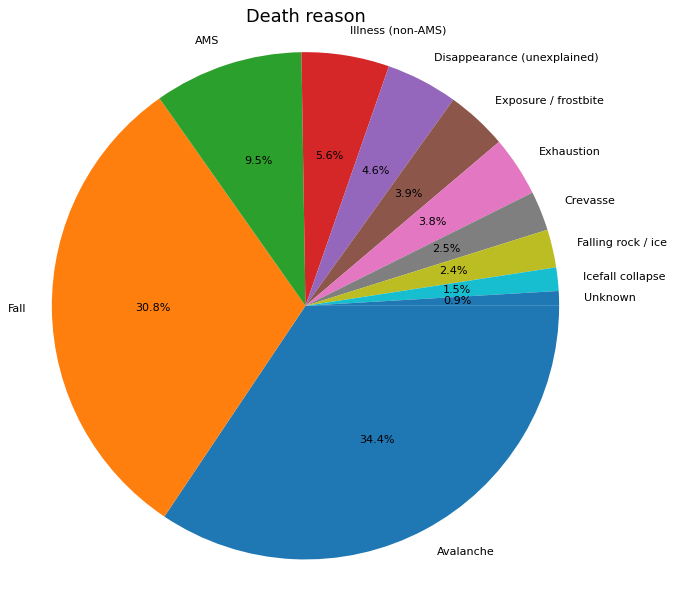

In [ ]:
reason = dfc['death_cause']
sum_reason = reason.value_counts()
plt.figure(figsize=(9,9), dpi=80)
plt.pie(sum_reason, labels=sum_reason.index.tolist(), counterclock=False, startangle=0, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Death reason', fontsize=16)
plt.show()

Graph 1. Death reason based on 114 years dataframe.



Avalanches, AMS(Alternated Mind status - caused by trauma or intoxication) and Illnes are the main reasons for death after falling. The same chart and same period of time on termination reason for expeditions. 

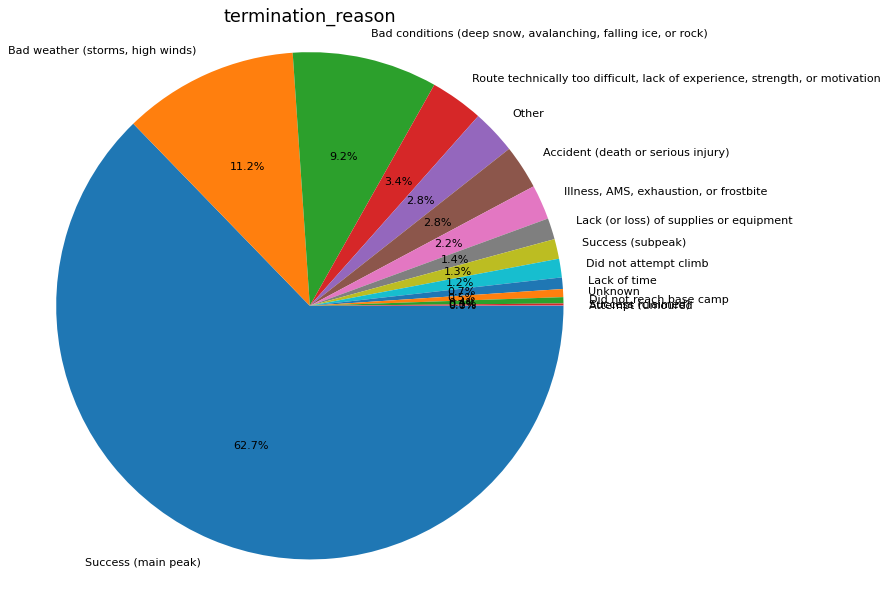

In [ ]:
termination=dfc['termination_reason']
sum_reason = termination.value_counts()
plt.figure(figsize=(9,9), dpi=80)
plt.pie(sum_reason, labels=sum_reason.index.tolist(), counterclock=False, startangle=0, autopct='%1.1f%%')
plt.axis('equal')
plt.title('termination_reason', fontsize=16)
plt.show()

Graph 2. Termination reason based on 114 years data


###Exploration and preparation for Goal 1.

Investigate the impact of the introduction of the climbing carabiner in 1910 on the survival rate of expeditions.

Splitting data for goal 1 which is before 1910 assign it to dataframe ‘before1910’ and after 1911 assigned to ‘after1910’.

In [ ]:
#spliting dfc for goal 1.
before1910 = dfc[dfc['year_x'] < 1910]
after1910 = dfc[dfc['year_x'] > 1911]


In [ ]:
before1910.shape

(13, 18)

In [ ]:
before1910['death_cause'].unique()

array([nan, 'Fall'], dtype=object)

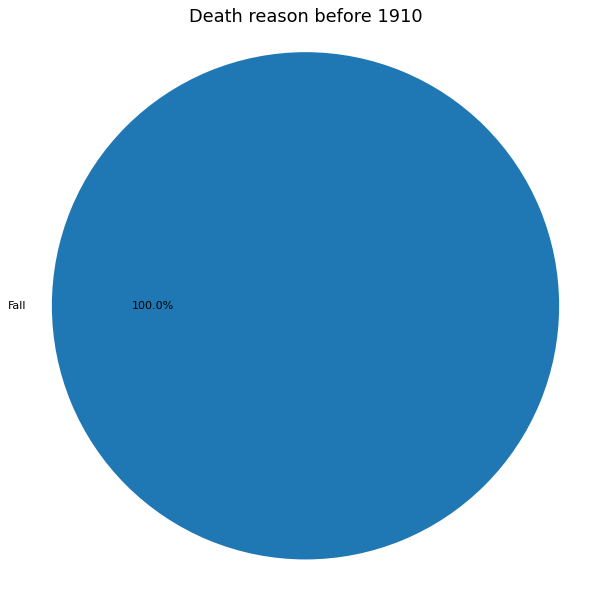

In [ ]:
reason_before1910 = before1910['death_cause']
sum_reason = reason_before1910.value_counts()
plt.figure(figsize=(9,9), dpi=80)
plt.pie(sum_reason, labels=sum_reason.index.tolist(), counterclock=False, startangle=0, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Death reason before 1910', fontsize=16)
plt.show()

Graph 3: Death reason before 1910

* Goal 1 will not be continued as there is not enough observation in data. More context provided in Results.

###Exploration and preparation for Goal 2.

Examine the effect of the implementation of dynamic rope and harness in the 1960s. By dividing the data into periods with and without these innovations, I can determine their impact on the falls prediction.

In [ ]:
#spliting dfc for goal 2.
no_harness_rope = dfc[dfc['year_x'] < 1960]
yes_harness_rope = dfc[dfc['year_x'] > 1961]

Plot pie-chart for death before 1960.

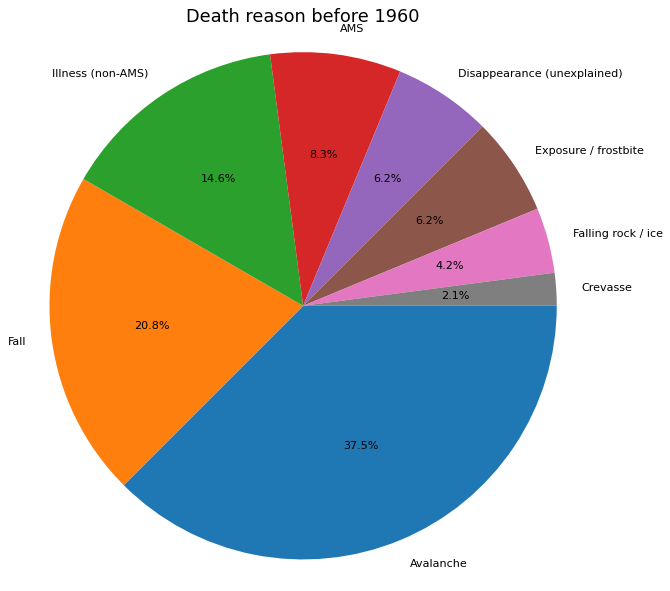

In [ ]:
reason_no_harness_rope = no_harness_rope['death_cause'] 
sum_reason = reason_no_harness_rope.value_counts() 
plt.figure(figsize=(9,9), dpi=80) 
plt.pie(sum_reason, labels=sum_reason.index.tolist(), counterclock=False, startangle=0, autopct='%1.1f%%') 
plt.axis('equal') 
plt.title('Death reason before 1960', fontsize=16) 
plt.show()

Graph 4: Death reason before 1960

Pie chart for data before 1960 indicate that avalanche and ilness was the biggest reasons to die and falling going into third place. 
Plot pie-chart for death after 1960.

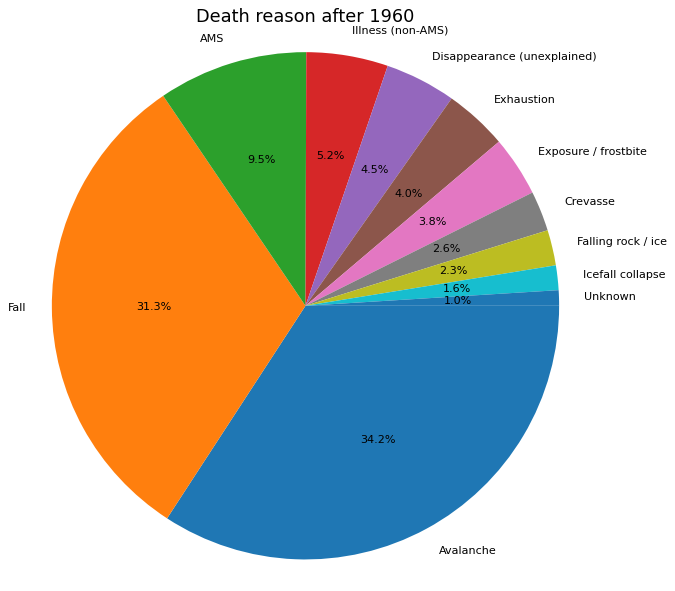

In [ ]:
reason_yes_harness_rope = yes_harness_rope['death_cause']
sum_reason = reason_yes_harness_rope.value_counts()
plt.figure(figsize=(9,9), dpi=80)
plt.pie(sum_reason, labels=sum_reason.index.tolist(), counterclock=False, startangle=0, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Death reason after 1960', fontsize=16)
plt.show()

Graph 5: Death reason after 1960

Graphs 5 and 1 are very similar but graphs 3 and 4 indicating that resons were changing along the years . 

Creating function that will save 1 when the fall occur and 0 if not.

In [ ]:
#creating categorise function
def categorise(row):
  if row['death_cause'] == 'Fall':
    return '1'
  elif row['death_cause'] != 'Fall':
    return '0' 

In [ ]:
#storing result of categorise function in new feature
dfc['falls'] = dfc.apply(lambda row: categorise(row), axis=1)
dfc.head(3)

,Unnamed: 0,expedition_id,year_x,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres_x,members,member_deaths,hired_staff,hired_staff_deaths,height_metres,first_ascent_year,member_id,peak_name,died,death_cause,falls
0,0,ANN260101,1960,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,10,0,9,0,7937,1960.0,ANN260101-01,Annapurna II,False,NaN,0
1,1,ANN260101,1960,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,10,0,9,0,7937,1960.0,ANN260101-04,Annapurna II,False,NaN,0
2,2,ANN260101,1960,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,10,0,9,0,7937,1960.0,ANN260101-03,Annapurna II,False,NaN,0


In [ ]:
#want to simplify my dataframe
dfS = dfc[['year_x', 'members', 'member_deaths', 'hired_staff', 'hired_staff_deaths','died', 'falls']]
dfS.head(3)


,year_x,members,member_deaths,hired_staff,hired_staff_deaths,died,falls
0,1960,10,0,9,0,False,0
1,1960,10,0,9,0,False,0
2,1960,10,0,9,0,False,0


###Analisys for Goal 2




In [ ]:
#importing libraries for analysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import warnings

In [ ]:
#ignoring warnings
warnings.filterwarnings('ignore')

Calculating the total number of falls and climbers in each group and then dividing the number of falls by the total number of climbers to find the fall incidence rate.

In [ ]:
#split dataframe for goal 2 for before and after, and adding new column
before = dfS[dfS['year_x'] < 1960]
after = dfS[dfS['year_x'] > 1961]

#adding new column 'harnes_used' where 0 mean no and 1 mean yes
before['harness_used'] = 0
after['harnes_used'] = 1

In [ ]:
after.head(3)

,year_x,members,member_deaths,hired_staff,hired_staff_deaths,died,falls,harnes_used
19,1969,10,0,0,0,False,0,1
20,1969,10,0,0,0,False,0,1
21,1969,10,0,0,0,False,0,1


In [ ]:
before.head(3)

,year_x,members,member_deaths,hired_staff,hired_staff_deaths,died,falls,harness_used
182,1950,6,0,0,0,False,0,0
183,1953,2,0,0,0,False,0,0
184,1953,7,0,0,0,False,0,0


In [ ]:
#convert columns to a numeric type
before['falls'] = pd.to_numeric(before['falls'], errors='coerce') 
#no_harness_rope['members'] = pd.to_numeric(no_harness_rope['members'], errors='coerce') 
after['falls'] = pd.to_numeric(after['falls'], errors='coerce') 
#yes_harness_rope['members'] = pd.to_numeric(yes_harness_rope['members'], errors='coerce') 

Calculating the fall incidence rate for two different data periods one without harness and rope, and one with harness and rope. 

In [ ]:
no_harness_rope_falls = before['falls'].sum() 
no_harness_rope_climbers = before['members'].sum() 
no_harness_rope_ir = no_harness_rope_falls / no_harness_rope_climbers 

yes_harness_rope_falls = after['falls'].sum() 
yes_harness_rope_climbers = after['members'].sum() 
yes_harness_rope_ir = yes_harness_rope_falls / yes_harness_rope_climbers 

print("Fall incidence rate without harness and rope: {:.2f}%".format(no_harness_rope_ir * 100)) 
print("Fall incidence rate with harness and rope: {:.2f}%".format(yes_harness_rope_ir * 100))

Fall incidence rate without harness and rope: 0.10%
Fall incidence rate with harness and rope: 0.04%


The fall incidence rate without harness and rope is 0.10%, which means that out of all the climbers who did not use a harness and rope, 0.1% of them reported falls. The fall incidence rate with harness and rope is 0.04%, which means that out of all the climbers who used a harness and rope, 0.04% of them reported falls. Overall, using a harness and rope seems to be associated with a lower fall incidence rate compared to not using one.

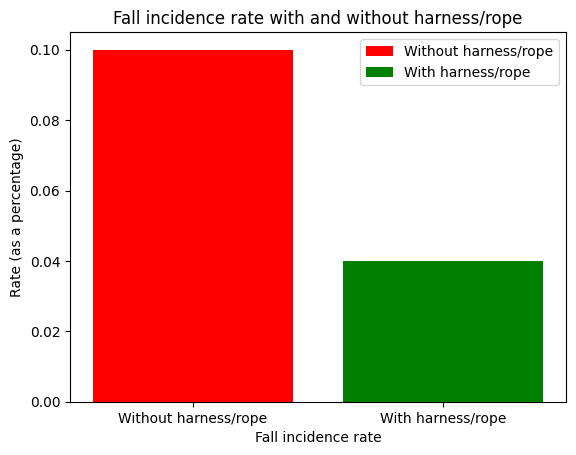

In [ ]:
# Define the data for the chart 
rate_without = 0.10 
rate_with = 0.04 
# Create a bar chart 
fig, ax = plt.subplots() 
ax.bar("Without harness/rope", rate_without, color='red', label='Without harness/rope') 
ax.bar("With harness/rope", rate_with, color='green', label='With harness/rope') 

# Set the axis labels and title 
ax.set_xlabel('Fall incidence rate') 
ax.set_ylabel('Rate (as a percentage)') 
ax.set_title('Fall incidence rate with and without harness/rope') 

# Add a legend 
ax.legend() 

# Show the plot 
plt.show()



Performing logistic regression on 'before' and 'after' dataframes to predict falls and prints out the confusion matrix and classification report for both 'before' and 'after' dataframes. 

In [ ]:
# Logistic Regression on 'before' dataframe 
X = before.drop(columns=['died', 'falls']) 
y = before['falls'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
lr_before = LogisticRegression(random_state=0) 
lr_before.fit(X_train, y_train) 
y_pred_before = lr_before.predict(X_test) 
print('Confusion Matrix for Before:') 
print(confusion_matrix(y_test, y_pred_before)) 
print('Classification Report for Before:') 
print(classification_report(y_test, y_pred_before)) 

# Logistic Regression on 'after' dataframe 
X = after.drop(columns=['died', 'falls']) 
y = after['falls'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
lr_after = LogisticRegression(random_state=0) 
lr_after.fit(X_train, y_train) 
y_pred_after = lr_after.predict(X_test) 
print('Confusion Matrix for After:') 
print(confusion_matrix(y_test, y_pred_after)) 
print('Classification Report for After:') 
print(classification_report(y_test, y_pred_after))

Confusion Matrix for Before:
[[274   0]
 [  2   0]]
Classification Report for Before:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       274
           1       0.00      0.00      0.00         2

    accuracy                           0.99       276
   macro avg       0.50      0.50      0.50       276
weighted avg       0.99      0.99      0.99       276

Confusion Matrix for After:
[[14908     0]
 [   60     2]]
Classification Report for After:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14908
           1       1.00      0.03      0.06        62

    accuracy                           1.00     14970
   macro avg       1.00      0.52      0.53     14970
weighted avg       1.00      1.00      0.99     14970



Hyperparameter tuning of logistic regression using GridSearchCV.

In [ ]:
X = before.drop(columns=['died', 'falls']) 
y = before['falls'] 
# Create a parameter grid 
param_grid = {'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']} 
# Create a GridSearchCV object 
grid = GridSearchCV(LogisticRegression(random_state=0), param_grid, verbose=3, cv=5, n_jobs=-1) 
# Fit the grid object to the training data 
grid.fit(X, y) 
# Print the best hyperparameters found 
print(grid.best_params_) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


GridSearchCV is searching through all possible combinations of 8 hyperparameter settings and using 5-fold cross-validation for each combination. The output indicates that the best set of hyperparameters is {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}.

- Observation for Goal 2
It seems that falls were more likely to occur in the 'before' dataset than in the 'after' dataset. This can be inferred from the fact that the 'recall' score for the '1' label ('falls') was higher in the 'before' dataset (0.00) than in the 'after' dataset (0.03), indicating that the model was better able to identify true positive 'falls' in the 'after' dataset than in the 'before' dataset.


----------------------------------------------------------------------------
###Exploration and preparation for Goal 3. 
Whats the percentage of hired_staff that need to be hired for expedition to be successful. Attempt to predict percentage for future expeditions.

In [ ]:
goal3= dfc[['year_x', 'members', 'hired_staff', 'termination_reason']].copy()
#only  subset for sucess as a termination reason will be considered 
G3= goal3[(goal3["termination_reason"] == 'Success (main peak)')] 
#droping termination reason as not needed anymore
G3 = goal3.drop('termination_reason', axis=1)
G3

,year_x,members,hired_staff
0,1960,10,9
1,1960,10,9
2,1960,10,9
3,1960,10,9
4,1960,10,9
...,...,...,...
76504,2019,6,4
76505,2019,6,4
76506,2019,2,1
76507,2019,2,1


In [ ]:
# Using DataFrame.transform() method. I want to get percant of hired staff for amount of members
G3['percent_hired'] = round(G3['hired_staff']/G3['members']*100)
G3

,year_x,members,hired_staff,percent_hired
0,1960,10,9,90.0
1,1960,10,9,90.0
2,1960,10,9,90.0
3,1960,10,9,90.0
4,1960,10,9,90.0
...,...,...,...,...
76504,2019,6,4,67.0
76505,2019,6,4,67.0
76506,2019,2,1,50.0
76507,2019,2,1,50.0


Ploting the percentage of hired staff for each year.

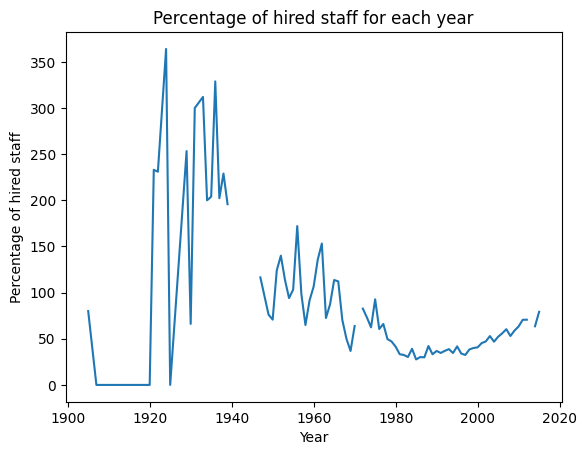

In [ ]:
import matplotlib.pyplot as plt 
# Group the data by year and calculate the average percentage of hired staff for each year 
yearly_percent_hired = G3.groupby('year_x')['percent_hired'].mean() 
# Create a line plot 
plt.plot(yearly_percent_hired.index, yearly_percent_hired.values) 
# Add labels and title 
plt.xlabel('Year') 
plt.ylabel('Percentage of hired staff')
#plt.ylim(0, 100) 
plt.title('Percentage of hired staff for each year') 
plt.show()

In [ ]:
G3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year_x,76509.0,2000.363134,14.790316,1905.0,1991.0,2004.0,2012.0,2019.0
members,76509.0,10.404671,8.716438,0.0,5.0,8.0,13.0,99.0
hired_staff,76509.0,5.978617,9.552845,0.0,1.0,3.0,7.0,99.0
percent_hired,76474.0,inf,NaN,0.0,14.0,43.0,88.0,inf


Data contain some inf and NaN values

In [ ]:
# Replacing infinite values data with nan
G3.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
G3.dropna(inplace=True)

In [ ]:
G3 = G3.dropna()
G3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year_x,76394.0,2000.361128,14.777498,1905.0,1991.0,2004.0,2012.0,2019.0
members,76394.0,10.420334,8.713636,1.0,5.0,8.0,13.0,99.0
hired_staff,76394.0,5.978559,9.557829,0.0,1.0,3.0,7.0,99.0
percent_hired,76394.0,57.497578,61.645769,0.0,13.0,43.0,86.0,1100.0


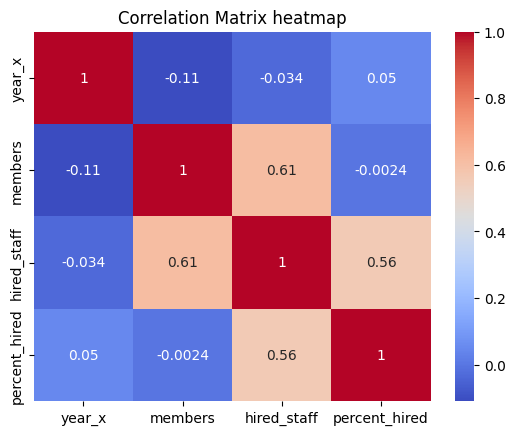

In [ ]:
# Create a correlation matrix 
corr_matrix = G3.corr() 
# Create a heatmap of the correlation matrix 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') 
plt.title('Correlation Matrix heatmap') 
plt.show() 

###Analisys for Goal 3



Creating a random forest regressor model to predict the 'percent_hired' column based on the 'members' and 'hired_staff' columns.

In [ ]:
# Split the data into train and test sets 
X = G3[['members', 'hired_staff']] 
# Independent variables 
y = G3['percent_hired'] 
# Dependent variable 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# Create a random forest regressor model 
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit the model to the training data 
rf.fit(X_train, y_train) 
# Make predictions on the test data 
y_pred = rf.predict(X_test) 
# Evaluate the model's performance 
from sklearn.metrics import mean_squared_error, r2_score 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
print("MSE:", mse) 
print("R-squared:", r2)

MSE: 0.13759521565547536
R-squared: 0.9999625008645775


Plotting model results.

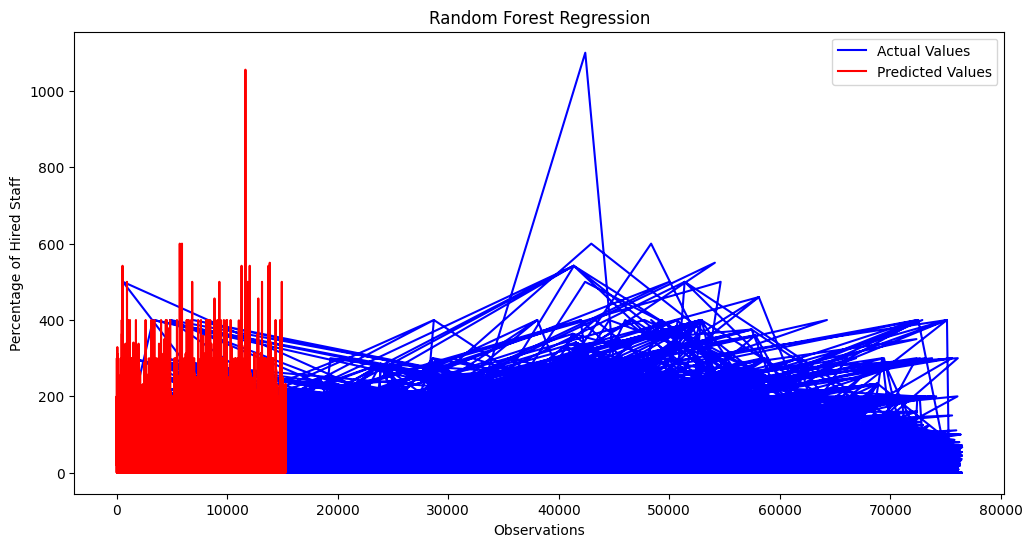

In [ ]:
plt.figure(figsize=(12, 6)) 
plt.title('Random Forest Regression') 
plt.plot(y_test, color='blue', label='Actual Values') 
plt.plot(y_pred, color='red', label='Predicted Values') 
plt.xlabel('Observations') 
plt.ylabel('Percentage of Hired Staff') 
plt.legend() 
plt.show() 

Trying to adjust hyperparameter to improve model performance using a GridSearchCV approach which is a popular method for finding the optimal hyperparameters by testing every combination of values for the hyperparameters. This code-box takes about 11 min to run.

In [ ]:
# Define the parameter grid to search over 
param_grid = { 'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 8], 'min_samples_leaf': [1, 2, 4], } 
# Pass the random forest regressor model and parameter grid to GridSearchCV 
rf = RandomForestRegressor(random_state=42) 
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error') 
# Fit the model to the training data and find the best hyperparameters 
grid_search.fit(X_train, y_train) 
# Print the best hyperparameters found by GridSearchCV 
print(grid_search.best_params_) 
# Make predictions on the test data using the best model found 
best_model = grid_search.best_estimator_ 
y_pred = best_model.predict(X_test) 
# Evaluate the model's performance 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
print("MSE:", mse) 
print("R-squared:", r2)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
MSE: 0.25135796399275034
R-squared: 0.9999314968453926


The first set of results, MSE=0.1376 and R-square=0.99996, are the performance metrics of my random forest regressor model without any hyperparameter tuning. This model used n_estimators=100, which is the default value for this parameter in the `RandomForestRegressor()` model. The second set of results, MSE=0.2514 and R-square=0.99993, are the performance metrics of the same random forest regressor model after hyperparameter tuning, with the following settings: max_depth=None, min_samples_leaf=1, min_samples_split=5, and n_estimators=50. The tuned model uses a smaller n_estimators than the default value, but other parameters are set manually. Overall, we can see that the second model performed worse in terms of both MSE and R-squared compared to the first model. This suggests that the default settings for the `RandomForestRegressor()` model might be more appropriate for my dataset. I am going to skip plotting this results.

- Observations for Goal3
It looks like the mean squared error (MSE) is 0.1375 and the R-squared value is 0.9999, indicating that the random forest model fits the data very well. This means that the model is able to make accurate predictions of the number of hired staff for future expeditions, based on the historical data that were fitted. From the graph I can read that from 20% to 40% of hired staff looks like perfect percent of hired staff for expedition to be sucessful. 

##Results

###Goal 1. 




After exploring data on this paper it looks like goal 1 need to be skipped as there is not enough data to support this comparison. This is very clear when we see how many record are in splited dataframe for before 1910 period and from the pie chart


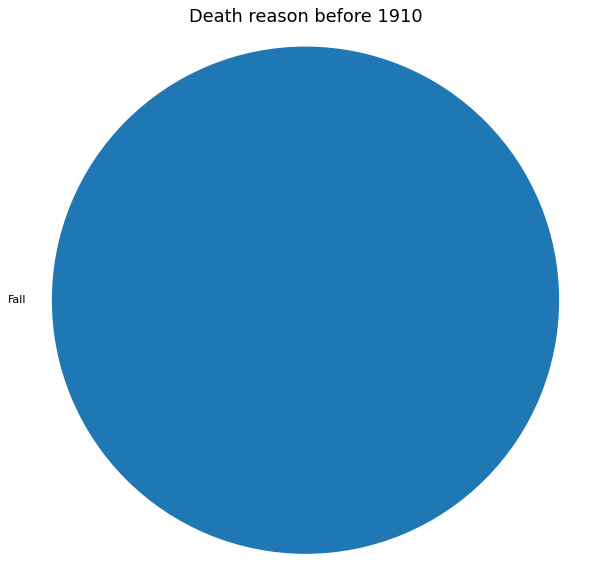



To get goal 1 accomplished it would be much better to analyse climbing data from another part of the world where there is more observations. Unfortunately observations made in pre-computerised years would be spread across various personal diaries so it would be very hard to group it.

###Goal 2. 
It seems that falls were more likely to occur in the 'before' dataset than in the 'after' dataset. This lead me to definite answer that development of harness and dynamic rope has impact on climbers savety.

###Goal 3.
From the graph I can read that hiring 20% to 40% of helping staff looks
like perfect percentage for expedition to be successful.

##Insights





####Goal 1.

 - There is not enough observations to provide definite answer if steel carabiner made any difference on climbing safety



####Goal 2.
 - Death due to fall is actually extreme as climbers are falling on route atttempt basis. Not all falls are dangerous. In dataset fall is listed only as a reason for death but there is no count how many time climbers has fall before they die. One of the reason to die due to fall is not due to break of the rope but most often due to bad protection placing in the rock. As in Nepal we are dealing with Ice climbing it could be due to loose ice.
  - Dispite safety new types of rope and harness made contribution to increase popularity of the sport. I assume there are more people surviving those expeditions and can share theres stories across the globe.



####Goal 3.
After performing random forest regressor model on both type of data I got really good visualisation for predicted percentage for future expeditions.From which I can read that hiring 20% to 40% of helping staff looks like perfect percentage for expedition to be successful. Where 20% seems to be minimum.


##References



Dataset: https://www.kaggle.com/datasets/majunbajun/himalayan-climbing-expeditions

Convert nominal to numerical values: https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

Generating more samples: https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/

Comparing: https://towardsdatascience.com/how-to-compare-two-or-more-distributions-9b06ee4d30bf

Scrapping webpage url: https://quotes.toscrape.com

Book - https://ethanweed.github.io/pythonbook

Supervised learning - https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/